# Mean and Median

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

food_consumption = pd.read_csv("food_consumption.csv")
amir_deals = pd.read_csv("amir_deals.csv")
world_happiness = pd.read_csv("world_happiness.csv")

In [61]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# Calculate mean and median consumption in Belgium
print("Belgium:")
print("Mean:", np.mean(be_consumption['consumption']))
print("Median:", np.median(be_consumption['consumption']))

# Calculate mean and median consumption in USA
print("\nUSA:")
print("Mean:", np.mean(usa_consumption['consumption']))
print("Median:", np.median(usa_consumption['consumption']))


Belgium:
Mean: 42.13272727272727
Median: 12.59

USA:
Mean: 44.650000000000006
Median: 14.58


In [62]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg(['mean', 'median']))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


# Mean vs Median

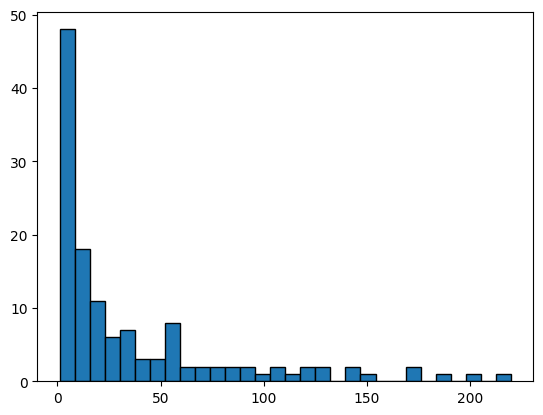

In [63]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'], bins=30, edgecolor='black')
plt.show()

# Measures of Spread

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


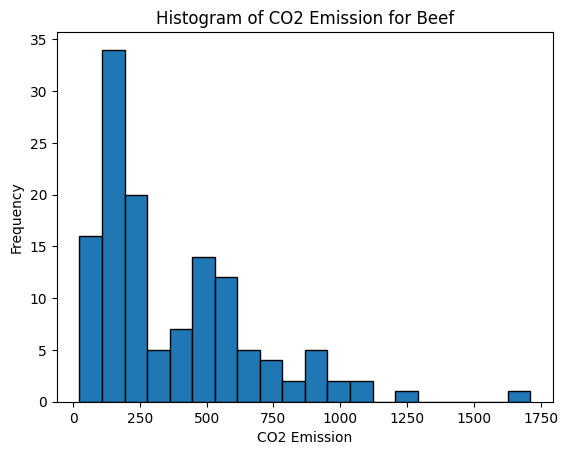

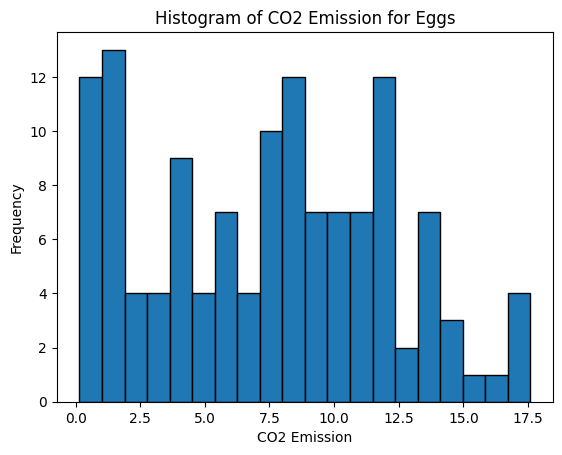

In [64]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'], bins=20, edgecolor='black')
plt.title('Histogram of CO2 Emission for Beef')
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency')

# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'], bins=20, edgecolor='black')
plt.title('Histogram of CO2 Emission for Eggs')
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency')

# Show plot
plt.show()


# Calculating Probabilities

In [65]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts / counts.sum()
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [66]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [67]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


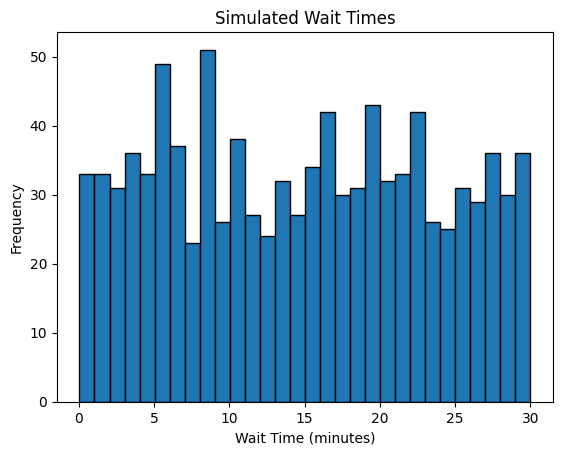

In [68]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times, bins=30, edgecolor='black')
plt.title('Simulated Wait Times')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')
plt.show()


In [69]:
# Given number of deals per week
n = 3

# Win rates
win_rate_30pct = 0.3
win_rate_25pct = 0.25
win_rate_35pct = 0.35

# Expected number won with 30% win rate
won_30pct = n * win_rate_30pct
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = n * win_rate_25pct
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = n * win_rate_35pct
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


In [70]:
# Import necessary libraries
from scipy.stats import norm

# Given parameters
mean_amount = 5000
std_dev_amount = 2000

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, mean_amount, std_dev_amount)

print(prob_less_7500)

0.8943502263331446


In [71]:
# Given parameters
mean_amount = 5000
std_dev_amount = 2000

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, mean_amount, std_dev_amount)

print(prob_over_1000)

0.9772498680518208


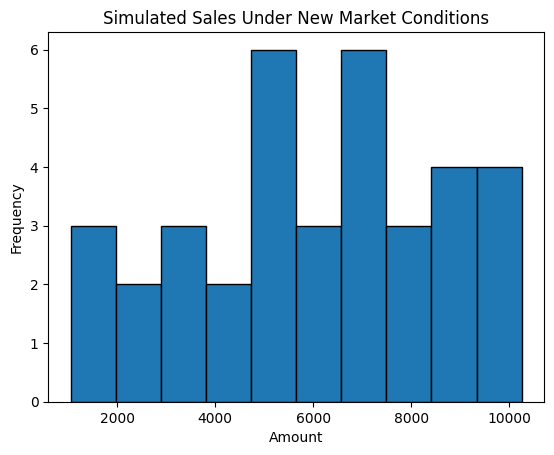

In [72]:
# Given parameters for current market conditions
current_mean = 5000
current_sd = 2000

# Given changes for new market conditions
increase_percent = 0.20  # 20% increase in mean
increase_sd_percent = 0.30  # 30% increase in standard deviation

# Calculate new average amount
new_mean = current_mean * (1 + increase_percent)

# Calculate new standard deviation
new_sd = current_sd * (1 + increase_sd_percent)

# Simulate 36 new sales
new_sales = np.random.normal(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales, bins=10, edgecolor='black')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Simulated Sales Under New Market Conditions')
plt.show()
